In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import os
import pandas as pd
%matplotlib inline
from dask.diagnostics import ProgressBar

In [2]:
# Uncomment next line for cheyenne:
#dir_base = '/glade/p/CMIP/CMIP5/output1/'
dir_base = './'

center = "NCAR"; model = "CCSM4"
scenario = "historical"
freq = "6hr"; realm = "atmos"; dtype = "6hrLev"

ddir = dir_base+center+'/'+model+'/'+scenario+'/'+freq+'/'+realm+'/'+dtype+'/'

# loop over ensemble members
for ens in os.listdir(ddir):
# lets pick a year for testing
    syear = str(1960)
    sdir = ddir+ens+'/latest/'
    tdir = '_6hrLev_'+model+'_'+scenario+'_'+ens+'_'
# all variables in all files for this year:
    fullyear = sdir+'*/*'+tdir+syear+'*.nc'
    with ProgressBar():
        ds = xr.open_mfdataset(fullyear)
        qu = ds.hus*ds.ua
        qv = ds.hus*ds.va
        dsm = ds.groupby('time.month').mean('time')
        dsm['qpup']= qu.groupby('time.month').mean('time') - dsm.hus * dsm.ua
        dsm['qpvp']= qv.groupby('time.month').mean('time') - dsm.hus * dsm.va
        dsm.to_netcdf('./output/monthly-'+ens+'.nc')
    

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  1.7s
[########################################] | 100% Completed |  2.3s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100

In [3]:
dsm.month
# how to change time coordinate to datetime? preserve the year?

<xarray.DataArray 'month' (month: 12)>
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

"""  other questions:
- how to remove a dataarray from a dataset?
- how to get the monthly mean to be at middle of month: 
    and more generally
- how to replace coordinates of a dimension
- how to add a new grid (for ensemble member)
"""

#rng = pd.date_range('1979-01-01T00:00:00', periods=365, freq='D')
#ts = pd.Series(np.random.randn(len(rng)), index=rng)
#ts.resample('M').mean()


[########################################] | 100% Completed |  1min 15.0s
[########################################] | 100% Completed |  1min 18.9s


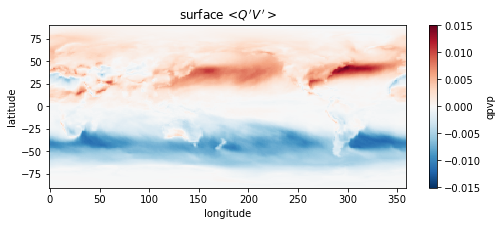

In [8]:
plt.figure(figsize=(8,3))
with ProgressBar():
    dp=dsm.qpvp.mean('month').sel(lev=1, method='nearest').plot()
plt.title(r'surface <$Q^{\,\prime} V^{\,\prime}>$')
plt.ylabel('latitude');plt.xlabel('longitude')
plt.show()